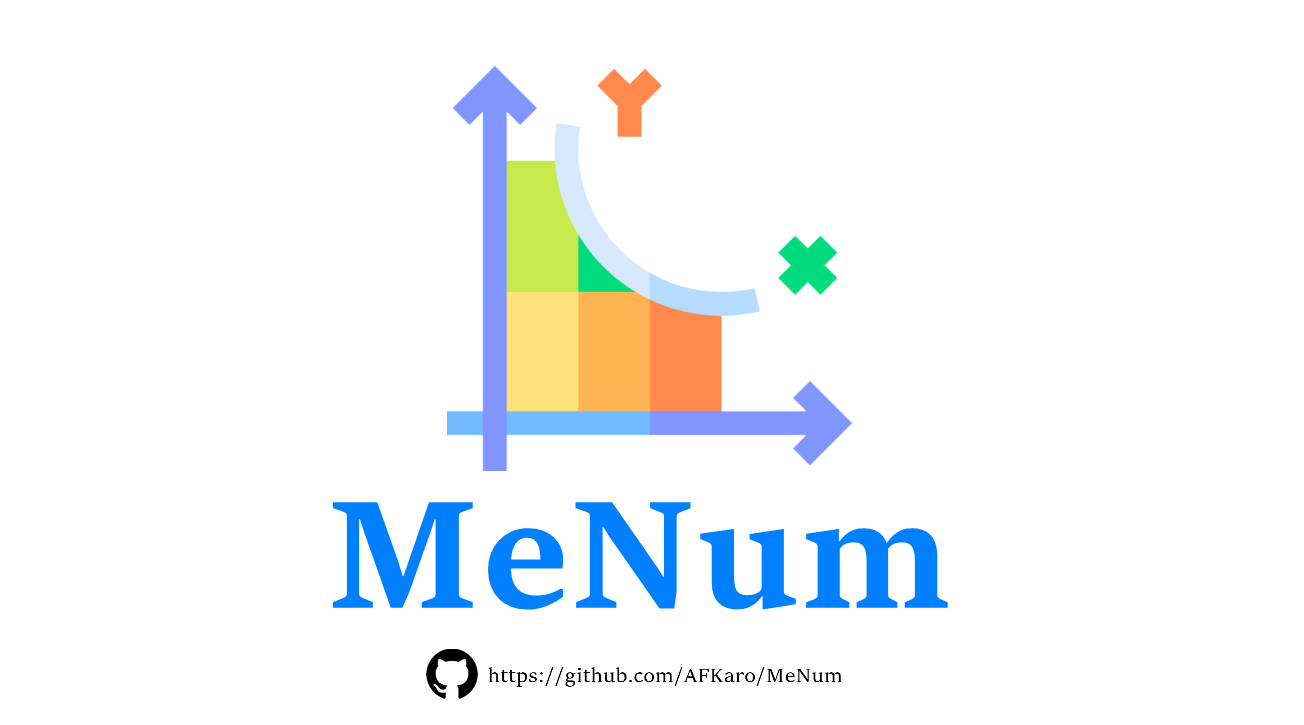

**Sobre**

MeNum é um conjunto de notebooks que permite simulações facilitadas de algoritmos de Métodos Numéricos.

## Zeros da Função


In [ ]:
# OBS: Esta é a célula principal execute a célula de Código (logo abaixo) antes desta!
menu()

### Exemplos de funções de entrada


# x**3-9*x+3 #



# x*log(x)-1 #



# sin(x)+cos(x) #



# x*e**(-x)-e**(-3) #


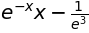

In [123]:
printExpressao("x**3-9*x+3")
printExpressao("x*log(x)-1")
printExpressao("sin(x)+cos(x)")
printExpressao("x*e**(-x)-e**(-3)")

## Codigo

### Menu

In [79]:
import matplotlib.pyplot as plt
def menu():
  print("Função: ")
  funcao = str(input())
  print("#### PARTE 01 ####")
  print("### Plotando e analizando o gráfico ###")
  resp = False
  while resp == False:
    print("Defina o range: (aperte apenas enter para utilizar o padrão[-4 a 4])")
    limInf = float(input("Limite Inferior: "))
    limSup = float(input("Limite Superior: "))
    print()
    ptsX, ptsFx = pontos(funcao, limInf, limSup)
    plotGrafico(ptsX,ptsFx)
    print()
    print("Deseja refazer o gráfico? [S ou N]")
    resp = str(input())
    if resp == "N" or resp == "n":
      resp = True
    elif resp == "S" or resp =="s":
      resp = False
    else:
      print("Valor invalido!")
    
  print("#### PARTE 02 ####")
  continuar = True
  while continuar == True:
    print("### Zeros da Função ###")
    a = float(input("Ponto a: "))
    b = float(input("Ponto b: "))
    erro = float(input("Erro: "))
    repetir = True
    while repetir == True:
      print("Escolha o metodo: ")
      print("[1] - Bisseção")
      print("[2] - Newton")
      metodo = int(input("Metodo: "))

      if metodo == 1:
        bissecao = ZerosFuncaoBissecao(a,b,erro,funcao)
        x = bissecao.zeroDaFuncao()
        print(f'RESULTADO: É possivel considerar x = {x:.5f} uma raiz da função f(x)= ',funcao)
        print("Iterações realizadas: ",bissecao.iteracoes)
        print()
        print("--- Histórico ---")
        print(bissecao.history)
      elif metodo == 2:
        newton = ZerosFuncaoNewton(a,b,erro,funcao)
        x = newton.zeroDaFuncao()
        print(f'RESULTADO: É possivel considerar x = {x:.5f} uma raiz da função f(x)= ',funcao)
        print("Iterações realizadas: ",newton.iteracoes)
        print()
        print("--- Histórico ---")
        print(newton.history)
      else:
        print("Valor invalido!")
      
      print("Deseja repetir o processo com outro metodo? [S ou N]")
      resp = str(input())
      if resp == "N" or resp == "n":
        repetir = False
      elif resp == "S" or resp =="s":
        repetir = True
      else:
        print("Valor invalido!")
    continuar = False
    print("Programa Finalizado com sucesso!")

### Metodos

In [80]:
import numpy as np

In [81]:
def pontos(funcao, limInf = -4, limSup = 4):
  x= symbols("x")
  ptsX = []
  ptsFx = []
  x_ = limInf
  expr = sympify(funcao)

  while x_ < limSup:
    ptsX.append(x_)
    fx = expr.subs(x,x_)
    ptsFx.append(float(fx))
    x_+=0.5
  return ptsX, ptsFx

In [82]:
def plotGrafico(ptsX, ptsFx):
  plt.figure(figsize=(10,10))
  plt.plot(ptsX,ptsFx,'k', markersize=1)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.grid()

  plt.axhline()
  plt.axvline()
  plt.xticks(np.arange(min(ptsX), max(ptsX)+1, 0.5))
  plt.show()

In [121]:
from IPython.display import display
def printExpressao(expr): 
  print("#",expr,"#")
  x = symbols('x')
  fx = sympify(expr)
  display(fx)
  print()

### Classes

In [83]:
import pandas as pd

class ZerosFuncaoBissecao():
  def __init__(self,
               a,
               b,
               erro, 
               funcao):
    self.a = a
    self.b = b
    self.erro = erro
    self.funcao = sympify(funcao)
    self.x = 0
    self.iteracoes = 1
    self.history = pd.DataFrame(columns=['f(a)', 'f(b)', 'x','f(x)'])

  def calculaX(self):
    return (self.a + self.b) / 2

  def zeroDaFuncao(self):
    x= symbols("x")
    fa = self.funcao.subs(x,self.a)
    fb = self.funcao.subs(x,self.b)
    self.x = self.calculaX()
    fx = self.funcao.subs(x,self.x)
    self.history.loc[self.iteracoes] = [f'{fa:.5f}']+[f'{fb:.5f}']+[f'{self.x:.5f}']+[f'{fx:.5f}']

    while (abs(fx) > self.erro):
      if fx < 0:
        self.a = self.x
      else:
        self.b = self.x

      self.x = self.calculaX()
      fx = self.funcao.subs(x,self.x)
      self.iteracoes+=1
      fa = self.funcao.subs(x,self.a)
      fb = self.funcao.subs(x,self.b)
      self.history.loc[self.iteracoes] = [f'{fa:.5f}']+[f'{fb:.5f}']+[f'{self.x:.5f}']+[f'{fx:.5f}']
    return self.x

In [84]:
from sympy import *

class ZerosFuncaoNewton():
  def __init__(self,
               a,
               b,
               erro, 
               funcao):
    self.a = a
    self.b = b
    self.erro = erro
    self.funcao = sympify(funcao)
    self.funcao_ = funcao
    self.x = 0
    self.iteracoes = 1
    self.history = pd.DataFrame(columns=['x','f(x)'])
      
  def calculaXInit(self):
    return (self.a + self.b) / 2

  def calculaX(self):
    x = symbols('x')
    fx = self.funcao.subs(x,self.x)
    expr = parse_expr(self.funcao_,locals())
    derivada = diff(expr, x)
    dfx = float(derivada.subs(x,self.x))
    return self.x-fx/dfx

  def zeroDaFuncao(self):
    x = symbols("x")
    self.x = self.calculaXInit()
    fx = self.funcao.subs(x,self.x)
    self.history.loc[self.iteracoes] = [f'{self.x:.5f}']+[f'{fx:.5f}']
    while (abs(fx) > self.erro):
      self.x = self.calculaX()
      fx = self.funcao.subs(x,self.x)
      self.iteracoes+=1
      self.history.loc[self.iteracoes] = [f'{self.x:.5f}']+[f'{fx:.5f}']
    return self.x